<a href="https://colab.research.google.com/github/Arnaldoeloi/google-mobility-report-analysis/blob/main/Google_Mobility_Data_Visualized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.0 Import Libraries and Dataset


In [32]:
!pip install matplotlib==3.3.2

     |████████████████████████████████| 11.6MB 265kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.3.1
    Uninstalling matplotlib-3.3.1:
      Successfully uninstalled matplotlib-3.3.1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

In [2]:
link = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"

data = pd.read_csv(link)
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


Let's first check what columns make the dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621847 entries, 0 to 2621846
Data columns (total 14 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   date                                                object 
 8   retail_and_recreation_percent_change_from_baseline  float64
 9   grocery_and_pharmacy_percent_change_from_baseline   float64
 10  parks_percent_change_from_baseline                  float64
 11  transit_stations_percent_change_from_

Cool, now let's clean and process the dataset to our purpose, which has a focus on Brazil states.


# 2.0 Pre-processing and Cleaning


In [12]:
data.country_region.unique()

array(['United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda',
       'Angola', 'Argentina', 'Austria', 'Australia', 'Aruba',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Benin', 'Bolivia',
       'Brazil', 'The Bahamas', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Switzerland', "Côte d'Ivoire", 'Chile', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cape Verde', 'Czechia', 'Germany', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Estonia', 'Egypt', 'Spain',
       'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau', 'Hong Kong',
       'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'Ireland',
       'Israel', 'India', 'Iraq', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kenya', 'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait',
       'Kazakhstan', 'Laos', 'Lebanon', 'Liechtenstein', 'Sri Lanka',
       'Lithuania', '

First, let's isolate the data from Brazil and its states.

In [4]:
data_br = data.loc[data.country_region == "Brazil",:].iloc[:,[1,2,3,7,8,9,10,11,12,13]].copy()
data_br.columns = ["country", "state", "city", "date", "retail", "grocery", "parks", "transit", "workplace", "residential"]
data_br.date = pd.to_datetime(data_br.date)

#Let's use the date as the index, this we'll be handy later
data_br.index=data_br.date
data_br.drop(labels="date", axis=1, inplace=True)
data_br

,country,state,city,retail,grocery,parks,transit,workplace,residential
date,,,,,,,,,
2020-02-15,Brazil,NaN,NaN,5.0,4.0,-5.0,8.0,6.0,0.0
2020-02-16,Brazil,NaN,NaN,2.0,3.0,-13.0,3.0,0.0,1.0
2020-02-17,Brazil,NaN,NaN,-2.0,0.0,-12.0,9.0,19.0,-1.0
2020-02-18,Brazil,NaN,NaN,-3.0,-1.0,-11.0,9.0,15.0,-1.0
2020-02-19,Brazil,NaN,NaN,-1.0,-2.0,-5.0,8.0,14.0,-1.0
...,...,...,...,...,...,...,...,...,...
2020-09-21,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-2.0,NaN
2020-09-22,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-8.0,NaN
2020-09-23,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-6.0,NaN


With the exception of Federal District, all other values from the "state" column start with "State of". We will remove this prefix.

In [5]:
data_br.state=data_br.state.str.replace("State of ","")

# 3.0 Isolating what we'll need



Let's take another look at our dataset so far.

In [6]:
data_br.head()

,country,state,city,retail,grocery,parks,transit,workplace,residential
date,,,,,,,,,
2020-02-15,Brazil,NaN,NaN,5.0,4.0,-5.0,8.0,6.0,0.0
2020-02-16,Brazil,NaN,NaN,2.0,3.0,-13.0,3.0,0.0,1.0
2020-02-17,Brazil,NaN,NaN,-2.0,0.0,-12.0,9.0,19.0,-1.0
2020-02-18,Brazil,NaN,NaN,-3.0,-1.0,-11.0,9.0,15.0,-1.0
2020-02-19,Brazil,NaN,NaN,-1.0,-2.0,-5.0,8.0,14.0,-1.0


In [7]:
data_br.state.unique()

array([nan, 'Federal District', 'Acre', 'Alagoas', 'Amapá', 'Amazonas',
       'Bahia', 'Ceará', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype=object)

Since we just want the data from the states (not the cities) we need to remove every data that has an information on "state" column and none in "city".

In [8]:
data_br_state = data_br.loc[~data_br.state.isnull() & data_br.city.isnull()].copy()
data_br_state.head()

,country,state,city,retail,grocery,parks,transit,workplace,residential
date,,,,,,,,,
2020-02-15,Brazil,Federal District,NaN,10.0,7.0,-8.0,8.0,8.0,0.0
2020-02-16,Brazil,Federal District,NaN,11.0,6.0,-10.0,4.0,0.0,2.0
2020-02-17,Brazil,Federal District,NaN,2.0,4.0,-1.0,11.0,22.0,-2.0
2020-02-18,Brazil,Federal District,NaN,1.0,4.0,2.0,14.0,22.0,-2.0
2020-02-19,Brazil,Federal District,NaN,-2.0,0.0,-3.0,9.0,20.0,-2.0


# 4.0 Plotting our graphs


First, let's set the base plot styling as fivethirtyeight.

In [24]:
plt.style.use("fivethirtyeight")

We'll also need a function to calculate percentage variation. Very straight forward:

In [10]:
def pct_change(a,b):
  return abs((float(b)-float(a))/float(a) * 100.0)

In [26]:
item = "retail" #retail, #grocery, parks, transit, workplace, residential
states = ["Espírito Santo", "Minas Gerais", "Rio de Janeiro", "São Paulo"]

In [29]:
data_br_state.groupby(by=[data_br_state.index, "state"]).mean().unstack()

retail                ... residential                    
state        Acre Alagoas Amapá  ...     Sergipe São Paulo Tocantins
date                             ...                                
2020-02-15    2.0     5.0  11.0  ...         0.0      -1.0       0.0
2020-02-16   -1.0    -4.0   8.0  ...         2.0       0.0       1.0
2020-02-17   -5.0    -4.0   2.0  ...         0.0      -1.0      -1.0
2020-02-18   -1.0    -3.0  -1.0  ...         0.0      -2.0      -1.0
2020-02-19   -2.0     1.0  -3.0  ...        -1.0      -2.0      -1.0
...           ...     ...   ...  ...         ...       ...       ...
2020-09-23    NaN     NaN   NaN  ...        10.0      11.0       9.0
2020-09-24    NaN     NaN   NaN  ...        10.0      10.0      10.0
2020-09-25    NaN     NaN   NaN  ...        10.0       9.0       9.0
2020-09-26    NaN     NaN   NaN  ...         8.0       6.0       7.0
2020-09-27    NaN     NaN   NaN  ...         8.0       5.0       6.0

[226 rows x 162 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator


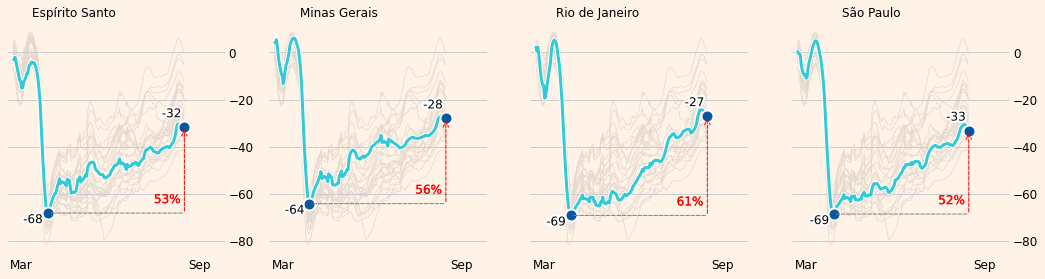

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=len(states), figsize=(16,4))

for i,state in enumerate(states):
  
  # We'll group the data by date
  unstacked_data = data_br_state.groupby(by=[data_br_state.index, "state"]).mean().unstack()
  
  min = unstacked_data[item][state].rolling(window=7).mean().min()
  min_point_txt = "{:.0f}".format(min)
  date_of_min_value = unstacked_data[item][state].rolling(window=7).mean().idxmin()

  date_of_current_value  = unstacked_data[item][state].loc[~unstacked_data[item][state].isnull()].rolling(window=7).mean().index.max()
  current_value = unstacked_data[item][state].loc[~unstacked_data[item][state].isnull()].rolling(window=7).mean().tail(1).values[0]
  current_point_txt = "{:.0f}".format(current_value)

  percentage_change = "{:.0f}%".format(pct_change(min, current_value))

  # All other states from Brazil in a less prominent color
  unstacked_data[item].rolling(window=7).mean().plot(legend=False, color="#e4d8cf", linewidth=0.7, zorder=0, alpha=1, ax=ax[i])
  # The state to be compared to 
  unstacked_data[item][state].rolling(window=7).mean().plot(legend=False, color="#33cad5", linewidth=3, zorder=1, alpha=1, ax=ax[i], path_effects=[PathEffects.withStroke(linewidth=5, foreground='w')] )

  # Let's use this style to all texts inside the plot
  text_path_effects = [PathEffects.withStroke(linewidth=4, foreground='w')]

  
  # PLOT MINIMUM AND CURRENT POINTS OVER THE OTHER LINE PLOT
  markers_on_x = [date_of_min_value, date_of_current_value]
  markers_on_y = [min, current_value]
  ax[i].plot(markers_on_x, markers_on_y, 'o', markerfacecolor='#06579e', markersize=12, markeredgecolor="white", markeredgewidth=2 )

  # GREY LINE POINTING TO MINIMUM VALUE
  ax[i].annotate("",
            xy=(date_of_min_value, min), xycoords='data',
            xytext=(date_of_current_value, min), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            linestyle="--",
                            linewidth=1,
                            color="grey"),
            )
  # MINIMUM VALUE TEXT OVER POINT
  ax[i].annotate(min_point_txt, xy=(date_of_min_value, min), xycoords="data", ha="right",  xytext=(-5, -10), textcoords='offset points', size=12, path_effects=text_path_effects)


  # RED LINE POINTING TO CURRENT VALUE
  ax[i].annotate("",
            xy=(date_of_current_value, current_value), xycoords='data',
            xytext=(date_of_current_value, min), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            linestyle="--",
                            linewidth=1,
                            color="red"),
            )
  # CURRENT VALUE TEXT OVER POINT
  ax[i].annotate(current_point_txt, xy=(date_of_current_value, current_value), xycoords="data", ha="right", xytext=(-3, 10), textcoords='offset points', size=12, path_effects=text_path_effects )


  # DRAW TEXT SHOWING PERCENTAGE CHANGE BETWEEN MINIMUM AND CURRENT
  ax[i].annotate(percentage_change, xy=(date_of_current_value, min), xycoords="data", ha="right", xytext=(-4, 10), textcoords='offset points', size=12, color="red", path_effects=[PathEffects.withStroke(linewidth=.2, foreground='red')] )


  # We'll align the state name to the top right part of the plot.
  ax[i].set_title(state, fontsize=12, ha='right', pad=5)

  # We don't want any grid
  ax[i].xaxis.grid(False)
  # nor x label
  ax[i].set_xlabel("")

  # For the x tickks, let's just use Mar and Sep
  ax[i].set_xticklabels(["", "Mar", "", "", "", "", "", "Sep"])
  ax[i].xaxis.set_tick_params(labelsize=12)
  ax[i].yaxis.set_tick_params(labelsize=12)

  # Now let's change our background colors to the ones used on Financial Times
  background_color = '#fff3e7'

  ax[i].set_facecolor(background_color)

  ax[i].spines['bottom'].set_alpha(0)
  ax[i].spines['top'].set_alpha(0)
  ax[i].spines['left'].set_alpha(0)
  ax[i].spines['right'].set_alpha(0)

  fig.patch.set_facecolor(background_color)
  fig.patch.set_alpha(1)
  fig.patch.set_edgecolor(background_color)
  fig.patch.set_linewidth(1)
  
  # For layout purposes, we just want the ysticks at the start and end of the plots.
  if (i==0) or (i==3):
    ax[i].yaxis.tick_right()
  else:
    ax[i].set_yticklabels([])

plt.savefig("states", dpi=300)
plt.show()


In [ ]:
#Workplace presence recovery during and after coronavirus outbreak made using Google Mobility Report.